In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Figure size used for the thesis
# matplotlib.rcParams.update({"figure.figsize": (5.5129, 3.5)})

# Size for the visualization in this notebook
# matplotlib.rcParams.update({"figure.figsize": (15, 10)})

# MetaBAT2 Kalø Vig (Bacteria taxonomy)save
metabat2_kaloevig = pd.read_table(
    "binning/results/2022-03-17/checkm/kaloevig/metabat/bacteria/results_bacteria_kaloevig_metabat.tsv",
    skiprows=[616],
)

# MetaBAT2 Kalø Vig (Bacteria taxonomy)
metabat2_loegten = pd.read_table(
    "binning/results/2022-03-17/checkm/loegten/metabat/bacteria/results_bacteria_loegten_metabat.tsv"
)

# DAS Tool (with MetaDecoder) Kalø Vig (Bacteria taxonomy)
dastool_kaloevig = pd.read_table(
    "binning/results/2022-03-22/checkm/kaloevig/dastool_metadecoder/bacteria/results_bacteria_kaloevig_dastool_metadecoder.tsv"
)

# DAS Tool (with MetaDecoder) Løgten (Bacteria taxonomy)
dastool_loegten = pd.read_table(
    "binning/results/2022-03-22/checkm/loegten/dastool_metadecoder/bacteria/results_bacteria_loegten_dastool_metadecoder.tsv"
)

# Integrative approach bins in Kalø Vig
integr_kaloevig = pd.read_table(
    "binning/results/2022-04-05/checkm/kaloevig/results_final_kaloevig_bins_checkm.tsv"
)

# Integrative approach bins in Løgten
integr_loegten = pd.read_table(
    "binning/results/2022-04-05/checkm/loegten/results_final_loegten_bins_checkm.tsv"
)

# Exclude contamination above the minimum value of the DAS Tool dataset
# and completeness below the minimum value of the DAST Tool dataset to make it comparable with DAS Tool bins
metabat2_kaloevig = metabat2_kaloevig[
    (metabat2_kaloevig["Contamination"] < 70.45)
    & (metabat2_kaloevig["Completeness"] > 11.29)
]

metabat2_loegten = metabat2_loegten[
    (metabat2_loegten["Contamination"] < 50.69)
    & (metabat2_loegten["Completeness"] > 15.2)
]

In [2]:
# # Use interquartile method to remove outliers from MetaBAT 2 datasets
# def detect_outliers(column):
#     """Detect outliers in a column with the interquartile method."""

#     Q1 = np.percentile(column, 25, method="midpoint")
#     Q3 = np.percentile(column, 75, method="midpoint")

#     IQR = Q3 - Q1

#     # Upper and lower bounds of the reange
#     upper = np.where(column >= (Q3 + 1.5 * IQR))
#     lower = np.where(column <= (Q1 - 1.5 * IQR))

#     return (upper, lower)

In [3]:
# # Drop contamination outliers in Kalø Vig
# metabat2_kaloevig.drop(detect_outliers(metabat2_kaloevig["Contamination"])[0][0], inplace=True)
# metabat2_kaloevig.drop(detect_outliers(metabat2_kaloevig["Contamination"])[1][0], inplace=True)

# # Drop completeness outliers in  Kalø Vig
# metabat2_kaloevig.drop(detect_outliers(metabat2_kaloevig["Completeness"])[0][0], inplace=True)
# metabat2_kaloevig.drop(detect_outliers(metabat2_kaloevig["Completeness"])[1][0], inplace=True)

# # Drop contamination outliers in Løgten
# metabat2_loegten.drop(detect_outliers(metabat2_loegten["Contamination"])[0][0], inplace=True)
# metabat2_loegten.drop(detect_outliers(metabat2_loegten["Contamination"])[1][0], inplace=True)

# # Drop completeness outliers in Løgten
# metabat2_loegten.drop(detect_outliers(metabat2_loegten["Completeness"])[0][0], inplace=True)
# metabat2_loegten.drop(detect_outliers(metabat2_loegten["Completeness"])[1][0], inplace=True)

In [4]:
## Style to use for plots

# Font for titles and subtitles
font_title = {"size": 16, "weight": "bold", "alpha": 0.75}
font_subtitle = {"size": 12, "alpha": 0.85}


def plot_style():
    """
    Improve plot style by increasing the label and tick font sizes.
    """

    # Remove ticks and set label size
    plt.tick_params(axis="both", labelsize=12, bottom=False, left=False)

    # Set x and y axes label size
    plt.xlabel(xlabel=plt.gca().get_xlabel(), size=12)
    plt.ylabel(ylabel=plt.gca().get_ylabel(), size=12)

In [5]:
def draw_kde(data_type, metabat_dataset, dastool_dataset, location):

    # Generate figure and axis
    fig, ax = plt.subplots()

    # Despine plots
    sns.despine()

    # Draw KDE plots
    sns.kdeplot(x=metabat_dataset[data_type], color="#005AB5", ax=ax)
    sns.kdeplot(x=dastool_dataset[data_type], color="#DC3220", ax=ax)

    # Title
    plt.title(
        f"KDE plot of MetaBAT 2 versus DAS Tool \n {data_type.lower()} in {location}",
        # fontdict=font_title,
    )

    # Legend
    ax.legend(labels=["MetaBAT 2", "DAS Tool"], fontsize=12, frameon=False)

    # Apply plot style
    plot_style()

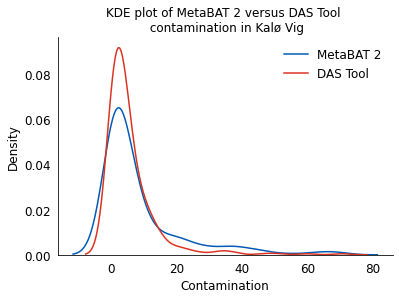

In [6]:
# Kalø Vig contamination
draw_kde(
    data_type="Contamination",
    metabat_dataset=metabat2_kaloevig,
    dastool_dataset=dastool_kaloevig,
    location="Kalø Vig",
)

plt.savefig(
    "thesis_figures/kde_contamination_kaloevig.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

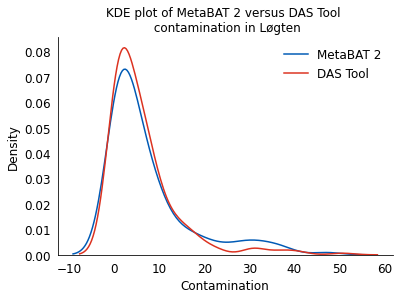

In [7]:
# Løgten contamination
draw_kde(
    data_type="Contamination",
    metabat_dataset=metabat2_loegten,
    dastool_dataset=dastool_loegten,
    location="Løgten",
)

plt.savefig(
    "thesis_figures/kde_contamination_loegten.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

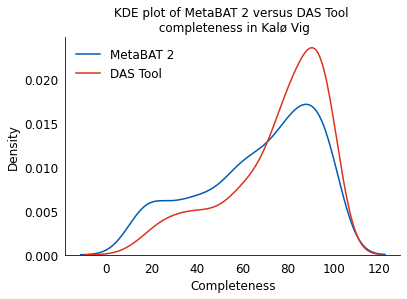

In [8]:
# Kalø Vig completeness
draw_kde(
    data_type="Completeness",
    metabat_dataset=metabat2_kaloevig,
    dastool_dataset=dastool_kaloevig,
    location="Kalø Vig",
)

plt.savefig(
    "thesis_figures/kde_completeness_kaloevig.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

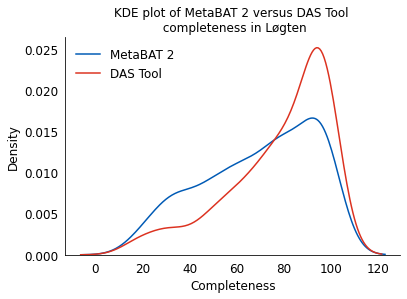

In [9]:
# Løgten completeness
draw_kde(
    data_type="Completeness",
    metabat_dataset=metabat2_loegten,
    dastool_dataset=dastool_loegten,
    location="Løgten",
)

plt.savefig(
    "thesis_figures/kde_completeness_loegten.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

## Histogram of Completeness, # Contigs, N50, Contamination Differences


In [10]:
# Open FastANI datasets
fastani_path = "binning/results/2022-07-06/fastani"
kaloevig_fastani = pd.read_csv(
    f"{fastani_path}/kaloevig_fastani.csv",
    header=None,
)
loegten_fastani = pd.read_csv(f"{fastani_path}/loegten_fastani.csv", header=None)

# Drop irrelevant columns
kaloevig_fastani = kaloevig_fastani.iloc[:, 0:3]
loegten_fastani = loegten_fastani.iloc[:, 0:3]

# Leave only 100% matches
kaloevig_fastani = kaloevig_fastani[kaloevig_fastani.iloc[:, 2] == 100]
loegten_fastani = loegten_fastani[loegten_fastani.iloc[:, 2] == 100]

# Add column names
fastani_cols = ["metabat_bins", "final_bins", "match"]
kaloevig_fastani.columns = fastani_cols
loegten_fastani.columns = fastani_cols

# Remove pathnames
kaloevig_fastani["metabat_bins"] = kaloevig_fastani["metabat_bins"].str.replace(
    "data/kaloevig_metabat2/", ""
)
kaloevig_fastani["final_bins"] = kaloevig_fastani["final_bins"].str.replace(
    "data/kaloevig_final/", ""
)

loegten_fastani["metabat_bins"] = loegten_fastani["metabat_bins"].str.replace(
    "data/loegten_metabat2/", ""
)
loegten_fastani["final_bins"] = loegten_fastani["final_bins"].str.replace(
    "data/loegten_final/", ""
)

# Remove .fa extenson
kaloevig_fastani["metabat_bins"] = kaloevig_fastani["metabat_bins"].str.replace(
    ".fa", "", regex=False
)
kaloevig_fastani["final_bins"] = kaloevig_fastani["final_bins"].str.replace(
    ".fa", "", regex=False
)

loegten_fastani["metabat_bins"] = loegten_fastani["metabat_bins"].str.replace(
    ".fa", "", regex=False
)
loegten_fastani["final_bins"] = loegten_fastani["final_bins"].str.replace(
    ".fa", "", regex=False
)

# Open MetaBAT2 Quast tables
quast_cols = ["Assembly", "# contigs", "N50"]
kaloevig_metabat_quast = pd.read_table(
    "binning/results/2022-07-06/quast/kaloevig/transposed_report.tsv",
    usecols=quast_cols,
)
loegten_metabat_quast = pd.read_table(
    "binning/results/2022-07-06/quast/loegten/transposed_report.tsv", usecols=quast_cols
)

# Open MetaBAT2 CheckM tables
checkm_cols = ["Bin Id", "Completeness", "Contamination"]
kaloevig_metabat_checkm = pd.read_table(
    "binning/results/2022-03-17/checkm/kaloevig/metabat/bacteria/results_bacteria_kaloevig_metabat.tsv",
    usecols=checkm_cols,
)
loegten_metabat_checkm = pd.read_table(
    "binning/results/2022-03-17/checkm/loegten/metabat/bacteria/results_bacteria_loegten_metabat.tsv",
    usecols=checkm_cols,
)

# Open final quality tables
quality_cols = ["Bin Id", "Completeness", "Contamination", "# contigs", "N50"]
kaloevig_quality_table = pd.read_csv(
    "binning/results/2022-04-05/common_files/kaloevig_quality_table.csv",
    usecols=quality_cols,
)
loegten_quality_table = pd.read_csv(
    "binning/results/2022-04-05/common_files/loegten_quality_table.csv",
    usecols=quality_cols,
)

In [11]:
# Merge FastANI and quality tables
### Kalø Vig ###
kaloevig_merged = kaloevig_fastani.merge(
    kaloevig_metabat_checkm, how="left", left_on="metabat_bins", right_on="Bin Id"
)

kaloevig_merged = kaloevig_merged.merge(
    kaloevig_metabat_quast, how="left", left_on="metabat_bins", right_on="Assembly"
)
kaloevig_merged = kaloevig_merged.merge(
    kaloevig_quality_table,
    how="left",
    left_on="final_bins",
    right_on="Bin Id",
    suffixes=["_metabat2", "_final"],
)

### Løgten ###
loegten_merged = loegten_fastani.merge(
    loegten_metabat_checkm, how="left", left_on="metabat_bins", right_on="Bin Id"
)
loegten_merged = loegten_merged.merge(
    loegten_metabat_quast, how="left", left_on="metabat_bins", right_on="Assembly"
)
loegten_merged = loegten_merged.merge(
    loegten_quality_table,
    how="left",
    left_on="final_bins",
    right_on="Bin Id",
    suffixes=["_metabat2", "_final"],
)

In [12]:
# Compute difference in completeness and contamination between final and MetaBAT2 bins
def comp_diff(dataset):
    """
    Create new columns with differences between metrics of final and MetaBAT2 bins.
    """
    dataset["completeness_diff"] = (
        dataset["Completeness_final"] - dataset["Completeness_metabat2"]
    )
    dataset["contamination_diff"] = (
        dataset["Contamination_final"] - dataset["Contamination_metabat2"]
    )
    dataset["#_contigs_diff"] = (
        dataset["# contigs_final"] - dataset["# contigs_metabat2"]
    )
    dataset["N50_diff"] = dataset["N50_final"] - dataset["N50_metabat2"]


comp_diff(kaloevig_merged)
comp_diff(loegten_merged)

## Number of Genes - Heatmap

In [13]:
genes_path = "genes/results/2022-05-23"

# Open datasets
kaloevig_filter = pd.read_csv(f"{genes_path}/kaloevig_gene_interest.csv", header=None)
kaloevig_genes = pd.read_csv(f"{genes_path}/kaloevig_genes.csv")

loegten_filter = pd.read_csv(f"{genes_path}/loegten_gene_interest.csv", header=None)
loegten_genes = pd.read_csv(f"{genes_path}/loegten_genes.csv")

marine_gs_filter = pd.read_csv(f"{genes_path}/marine_gs_gene_interest.csv", header=None)
marine_gs_genes = pd.read_csv(f"{genes_path}/marine_gs_illumina_genes.csv")

# Filter to get only bins of intereston_oxidation
def filter_dataset(dataset, dataset_filter):
    """Filter dataset for genes of interest."""
    return dataset[dataset["Bin Id"].isin(dataset_filter[0])].reset_index(drop=True)


kaloevig_filtered = filter_dataset(kaloevig_genes, kaloevig_filter)
loegten_filtered = filter_dataset(loegten_genes, loegten_filter)
marine_gs_filtered = filter_dataset(marine_gs_genes, marine_gs_filter)


def extract_taxa(taxa):
    """
    Return classification from a list of taxa if any classification name is present after the classification category and double underscore.
    """
    return [taxon for taxon in taxa if len(taxon) > 3][-1]


def prepare_dataset(dataset):
    """Prepare dataset for heatmap drawing."""
    dataset.loc[:, "Classification"] = (
        dataset["classification"].str.split(";").apply(extract_taxa)
    )
    dataset = dataset.sort_values("Classification", ascending=False)

    return dataset


# Filter datasets
kaloevig_filtered = prepare_dataset(kaloevig_filtered)
loegten_filtered = prepare_dataset(loegten_filtered)
marine_gs_filtered = prepare_dataset(marine_gs_filtered)

# Prepare datasets
kaloevig_final = prepare_dataset(kaloevig_filtered)
loegten_final = prepare_dataset(loegten_filtered)
marine_gs_final = prepare_dataset(marine_gs_filtered)

kaloevig_final.set_index("Classification", inplace=True)
loegten_final.set_index("Classification", inplace=True)
marine_gs_final.set_index("Classification", inplace=True)

marine_gs_final = marine_gs_final.fillna(0)
marine_gs_final.iloc[:, 7:] = marine_gs_final.iloc[:, 7:].astype(int)

In [14]:
def draw_heatmap(dataset, title):
    """Draws a heatmap out of input dataset for the number of protein heats, and sets a title."""

    proteins = ["OmcS", "MtrC", "OmcB", "OmcC", "PioA", "OmcZ"]

    fig, ax = plt.subplots(figsize=(5.5129, 5))

    # Highest number of protein hits in dataset
    N = dataset[proteins].max().max()

    # Create color map for color bar
    cmap = sns.cubehelix_palette(start=0.6, rot=-0.4, light=0.95, n_colors=N + 1)

    # Color bar properties
    cbar_kws = dict(pad=0.02, drawedges=True, ticks=range(N + 1))

    # Draw heatmap
    sns.heatmap(
        dataset[proteins],
        cmap=ListedColormap(cmap),
        vmin=-0.5,
        cbar_kws=cbar_kws,
        vmax=N + 0.5,
        ax=ax,
    )

    # Increase the font size of colorbar's label
    cbar = ax.collections[0].colorbar
    cbar.ax.set_ylabel("Number of protein hits", fontsize=12, labelpad=15)

    # Colorbar edges
    cbar.dividers.set_color("white")
    cbar.dividers.set_linewidth(1)

    # Remove minor ticks from colorbar
    cbar.ax.tick_params(right=False)

    # Title
    plt.title(title, fontdict=font_title)

    # Remove ticks
    plt.tick_params(bottom=False, left=False)

    # Set axes labels
    ax.set_xlabel("Proteins", size=12)
    ax.set_ylabel("Classification", size=12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


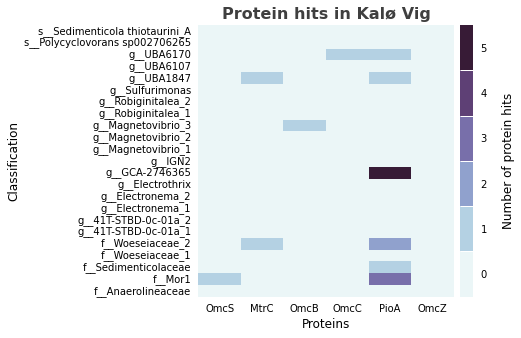

In [15]:
draw_heatmap(kaloevig_final, "Protein hits in Kalø Vig")

plt.savefig(
    "thesis_figures/protein_hits_in_kalo_vig.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


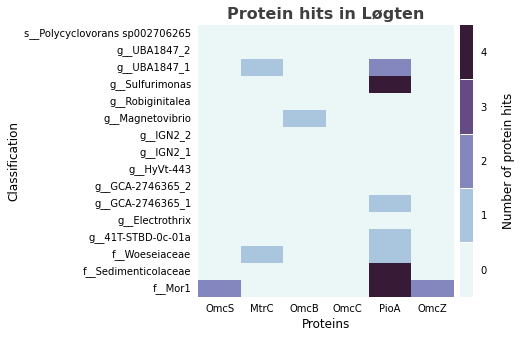

In [16]:
draw_heatmap(loegten_final, "Protein hits in Løgten")

plt.savefig(
    "thesis_figures/protein_hits_in_logten.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


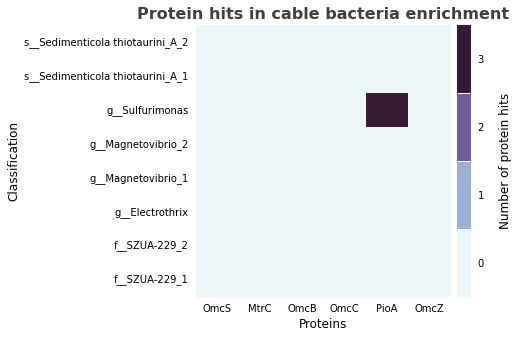

In [17]:
draw_heatmap(marine_gs_final, "Protein hits in cable bacteria enrichment")

plt.savefig(
    "thesis_figures/protein_hits_marine_gs.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

# Abundance Barplots of Taxa of Interest

In [18]:
def draw_barplot_shortlisted(dataset, title, subtitle, abundance_threshold=65, bins=10):
    """Draw horizontal barplot of taxa abundance."""
    dataset = dataset.reset_index()

    # Sort taxa by abundance for bar ordering
    dataset = dataset.sort_values("AvgDepth", ascending=False).head(bins)

    fig, ax = plt.subplots(figsize=(5.5129, 4.5))
    dataset.plot.barh(x="Classification", y="AvgDepth", ax=ax)

    # Highlight the most abundant bins
    for bar in plt.gca().patches:
        if bar.get_width() < abundance_threshold:  # Threshold of abundance
            bar.set_color("lightgrey")
        else:
            bar.set_color("#39A8F0")

    # Remove legend
    ax.get_legend().remove()

    # Set x and ylabel
    plt.xlabel("Average coverage (abundance)", size=14)
    plt.ylabel("Classification", size=14)

    # Remove ticks
    ax.tick_params(axis="both", length=0)

    # Plot style
    ax.invert_yaxis()
    sns.despine()
    plt.yticks(size=10)

    # Title
    plt.title(
        subtitle, fontdict=font_subtitle
    )  # Title is misleading as it is below the real title
    plt.suptitle(title, fontsize=16, fontweight="bold", alpha=0.75)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


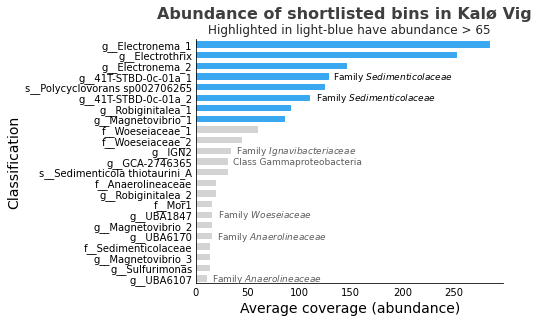

In [19]:
draw_barplot_shortlisted(
    kaloevig_final,
    title="Abundance of shortlisted bins in Kalø Vig",
    subtitle="Highlighted in light-blue have abundance > 65",
    abundance_threshold=65,
    bins=25,
)

# Provide more background information on cryptically named taxa
black_style = dict(size=9, color="black")
grey_style = dict(size=9, color="#5C5C5C")

plt.text(s="Family $\itSedimenticolaceae$", x=133, y=3.3, **black_style)
plt.text(s="Family $\itSedimenticolaceae$", x=116, y=5.3, **black_style)
plt.text(s="Family $\itIgnavibacteriaceae$", x=39, y=10.3, **grey_style)
plt.text(s="Class Gammaproteobacteria", x=36, y=11.3, **grey_style)
plt.text(s="Family $\itWoeseiaceae$", x=21, y=16.3, **grey_style)
plt.text(s="Family $\itAnaerolineaceae$", x=20, y=18.3, **grey_style)
plt.text(s="Family $\itAnaerolineaceae$", x=16, y=22.3, **grey_style)

# Save figure
plt.savefig(
    "thesis_figures/shortlisted_bin_abundance_in_kalo_vig.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


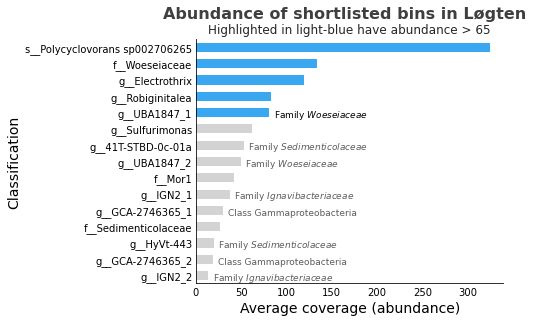

In [20]:
draw_barplot_shortlisted(
    loegten_final,
    title="Abundance of shortlisted bins in Løgten",
    subtitle="Highlighted in light-blue have abundance > 65",
    abundance_threshold=65,
    bins=15,
)

plt.text(s="Family $\itWoeseiaceae$", x=86, y=4.3, **black_style)
plt.text(s="Family $\itSedimenticolaceae$", x=58, y=6.3, **grey_style)
plt.text(s="Family $\itWoeseiaceae$", x=54, y=7.3, **grey_style)
plt.text(s="Family $\itIgnavibacteriaceae$", x=42, y=9.3, **grey_style)
plt.text(s="Class Gammaproteobacteria", x=35, y=10.3, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=25, y=12.3, **grey_style)
plt.text(s="Class Gammaproteobacteria", x=24, y=13.3, **grey_style)
plt.text(s="Family $\itIgnavibacteriaceae$", x=18.5, y=14.3, **grey_style)

# Save figure
plt.savefig(
    "thesis_figures/shortlisted_bins_abundance_in_logten.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)


plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


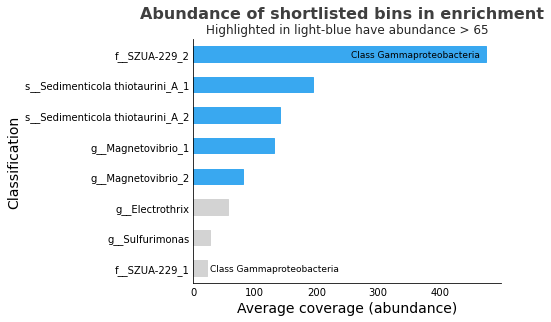

In [21]:
draw_barplot_shortlisted(
    marine_gs_final,
    title="Abundance of shortlisted bins in enrichment",
    subtitle="Highlighted in light-blue have abundance > 65",
    abundance_threshold=65,
)

plt.text(s="Class Gammaproteobacteria", x=255, y=0.1, **black_style)
plt.text(s="Class Gammaproteobacteria", x=27, y=7.1, **black_style)

plt.savefig(
    "thesis_figures/shortlisted_bins_abundance_in_marine_gs.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

plt.show()

In [22]:
# Prepare datasets for plot drawing
kaloevig_all_taxa = prepare_dataset(kaloevig_genes)
kaloevig_all_taxa = kaloevig_all_taxa.sort_values("AvgDepth", ascending=False)

loegten_all_taxa = prepare_dataset(loegten_genes)
loegten_all_taxa = loegten_all_taxa.sort_values("AvgDepth", ascending=False)

marine_gs_all_taxa = prepare_dataset(marine_gs_genes)
marine_gs_all_taxa = marine_gs_all_taxa.sort_values("AvgDepth", ascending=False)

In [23]:
def draw_barplot_all(dataset_all, dataset_shortlisted, title, subtitle):
    """Draw barplot of the most abundant bins and highlight those shortlisted."""

    fig, ax = plt.subplots(figsize=(5.5219, 4.8))

    # Labels and values
    lab = list(dataset_all["Classification"].head(20))
    lab_y = [i for i in range(len(lab))]
    val = dataset_all["AvgDepth"].head(20)

    colors = [
        "#39A8F0" if taxa in dataset_shortlisted.index else "lightgrey"
        for taxa in dataset_all["Classification"]
    ]

    # Plot
    plt.barh(lab_y, val, color=colors)

    # Plot style
    plt.yticks(lab_y, lab, size=10)
    sns.despine()

    plt.gca().invert_yaxis()
    
    # Remove ticks
    ax.tick_params(axis="both", length=0)

    # x and y labels
    plt.xlabel("Average coverage (abundance)", fontsize=14)
    plt.ylabel("Classification", fontsize=14)

    plt.title(subtitle, fontdict=font_subtitle)
    plt.suptitle(title, fontsize=16, fontweight="bold", alpha=0.75)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


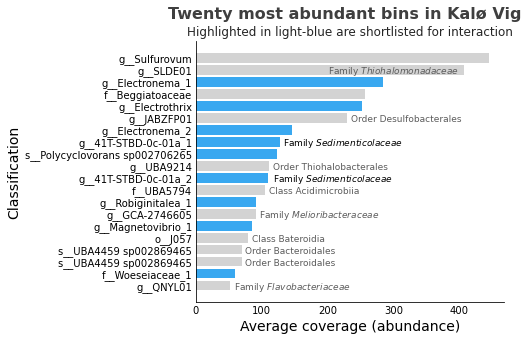

In [24]:
draw_barplot_all(
    dataset_all=kaloevig_all_taxa,
    dataset_shortlisted=kaloevig_final,
    title="Twenty most abundant bins in Kalø Vig",
    subtitle="Highlighted in light-blue are shortlisted for interaction",
)

# Provide more background information on cryptically named taxa
plt.text(s="Family $\itThiohalomonadaceae$", x=200, y=1.3, **grey_style)
plt.text(s="Order Desulfobacterales", x=235, y=5.3, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=132, y=7.3, **black_style)
plt.text(s="Order Thiohalobacterales", x=117, y=9.3, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=117, y=10.3, **black_style)
plt.text(s="Class Acidimicrobiia", x=111, y=11.3, **grey_style)
plt.text(s="Family $\itMelioribacteraceae$", x=96, y=13.3, **grey_style)
plt.text(s="Class Bateroidia", x=85, y=15.3, **grey_style)
plt.text(s="Order Bacteroidales", x=75, y=16.3, **grey_style)
plt.text(s="Order Bacteroidales", x=75, y=17.3, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=58, y=19.3, **grey_style)

plt.savefig(
    "thesis_figures/twenty_most_abundant_bins_in_kalovig.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


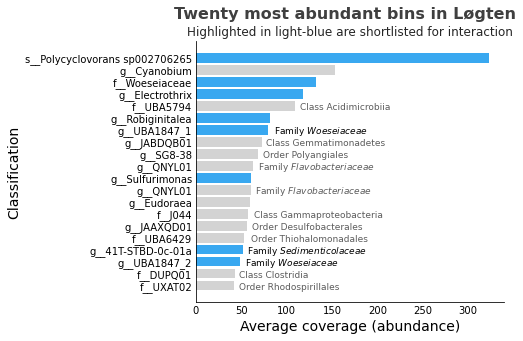

In [25]:
draw_barplot_all(
    dataset_all=loegten_all_taxa,
    dataset_shortlisted=loegten_final,
    title="Twenty most abundant bins in Løgten",
    subtitle="Highlighted in light-blue are shortlisted for interaction",
)

# Provide more background information on cryptically named taxa
plt.text(s="Class Acidimicrobiia", x=115, y=4.3, **grey_style)
plt.text(s="Family $\itWoeseiaceae$", x=86, y=6.3, **black_style)
plt.text(s="Class Gemmatimonadetes", x=77, y=7.3, **grey_style)
plt.text(s="Order Polyangiales", x=74, y=8.3, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=68, y=9.3, **grey_style)
plt.text(s="Family $\itFlavobacteriaceae$", x=65, y=11.3, **grey_style)
plt.text(s="Class Gammaproteobacteria", x=64, y=13.3, **grey_style)
plt.text(s="Order Desulfobacterales", x=62, y=14.3, **grey_style)
plt.text(s="Order Thiohalomonadales", x=61, y=15.3, **grey_style)
plt.text(s="Family $\itSedimenticolaceae$", x=56, y=16.3, **black_style)
plt.text(s="Family $\itWoeseiaceae$", x=54, y=17.3, **black_style)
plt.text(s="Class Clostridia", x=47, y=18.3, **grey_style)
plt.text(s="Order Rhodospirillales", x=47, y=19.3, **grey_style)

plt.savefig(
    "thesis_figures/twenty_most_abundant_bins_in_logten.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


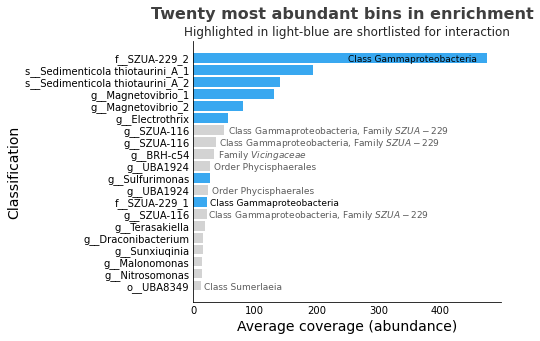

In [26]:
draw_barplot_all(
    dataset_all=marine_gs_all_taxa,
    dataset_shortlisted=marine_gs_final,
    title="Twenty most abundant bins in enrichment",
    subtitle="Highlighted in light-blue are shortlisted for interaction",
)

# Provide more background information on cryptically named taxa
plt.text(s="Class Gammaproteobacteria", x=250, y=0.3, **black_style)
plt.text(s="Class Gammaproteobacteria, Family $\itSZUA-229$", x=56, y=6.3, **grey_style)
plt.text(s="Class Gammaproteobacteria, Family $\itSZUA-229$", x=42, y=7.3, **grey_style)
plt.text(s="Family $\itVicingaceae$", x=41, y=8.3, **grey_style)
plt.text(s="Order Phycisphaerales", x=34, y=9.3, **grey_style)
plt.text(s="Order Phycisphaerales", x=30, y=11.3, **grey_style)
plt.text(s="Class Gammaproteobacteria", x=28, y=12.3, **black_style)
plt.text(
    s="Class Gammaproteobacteria, Family $\itSZUA-229$", x=24, y=13.3, **grey_style
)
plt.text(s="Class Sumerlaeia", x=18, y=19.3, **grey_style)

plt.savefig(
    "thesis_figures/twenty_most_abundant_bins_in_marine_gs.eps",
    format="eps",
    dpi=300,
    bbox_inches="tight",
)